<a href="https://colab.research.google.com/github/guscldns/TestProject/blob/main/0818/pytoch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import torch

### 뷰(View) : 원소의 수를 유지하면서 텐서의 크기 변경. 매우 중요!
- torch.FloatTensor 안에 있음

In [ ]:
t = np.array([[[0, 1, 2],
               [3, 4, 5]],
              [[6, 7, 8],
               [9, 10, 11]]])
ft = torch.FloatTensor(t)

In [ ]:
print(ft.shape)

torch.Size([2, 2, 3])


In [ ]:
ft.view(-1,2) # 2열로 만들되 행은 알아서 만들어라

tensor([[ 0.,  1.],
        [ 2.,  3.],
        [ 4.,  5.],
        [ 6.,  7.],
        [ 8.,  9.],
        [10., 11.]])

In [5]:
ft.view([-1,1,3])

tensor([[[ 0.,  1.,  2.]],

        [[ 3.,  4.,  5.]],

        [[ 6.,  7.,  8.]],

        [[ 9., 10., 11.]]])

In [10]:
narray = np.array([[1,2,3],
          [4,5,6],
          [7,8,9]])
tf_array = torch.FloatTensor(narray)
print(tf_array)
tf_array.view(-1) # 1차원 텐서로 변경, Fullconnetied layer 에 들어가려면 1차원으로 펴줘야 한다

tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])


tensor([1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [11]:
ft = torch.FloatTensor([[0], [1], [2]])
print(ft)
print(ft.shape)

tensor([[0.],
        [1.],
        [2.]])
torch.Size([3, 1])


### 언스퀴즈(Unsqueeze) - 특정 위치에 1인 차원을 추가한다.
- 인덱스로 이해하면 편하다

In [16]:
ft_1 = ft.unsqueeze(0)
print(ft_1)
print(ft_1.shape)

tensor([[[0.],
         [1.],
         [2.]]])
torch.Size([1, 3, 1])


In [13]:
un_ft = ft.unsqueeze(-1)
print(un_ft)
print(un_ft.shape)

tensor([[[0.]],

        [[1.]],

        [[2.]]])
torch.Size([3, 1, 1])


### 타입 캐스팅(Type Casting) : tensorlist

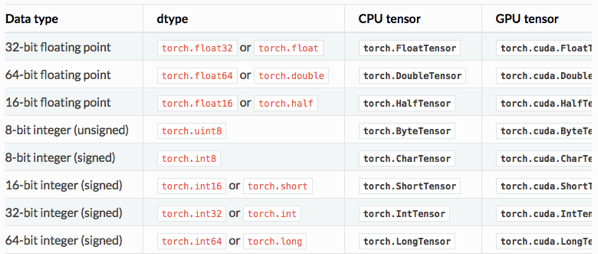
- https://wikidocs.net/images/page/52846/newimage.png

### 스택킹(Stacking):  영어로 쌓는다는 의미
- 연결(concatenate)해준다

In [17]:
x = torch.FloatTensor([1, 4])
y = torch.FloatTensor([2, 5])
z = torch.FloatTensor([3, 6])

print(torch.stack([x, y, z]))
# 3개의 벡터가 순차적으로 쌓여 (3 × 2) 텐서가 된다

tensor([[1., 4.],
        [2., 5.],
        [3., 6.]])


### 선형회귀 : y = wx+b

In [33]:
import torch # 파이토치 딥러닝 프레임 워크
import torch.nn as nn # 선형식을 선언하기 위해 씀
import torch.nn.functional as F # 수학적 함수를 불러올 때
import torch.optim as optim # 옵티마이저 불러오려고

#### <참고> 랜덤 시드 : 랜덤하게 들어가는 초기 값을 fix(고정)하려고 사용,
- 단! 컴퓨터마다 랜덤 테이블이 있는데 랜덤 시드는 랜덤 테이블에 고정되기 때문에 다른 컴퓨터를 사용하면 고정되지 않는다(ex: colab(연결할 때마다 다른 컴퓨터))
- 랜덤 시드가 라이브러리마다 다름

In [ ]:
# 현재 실습하고 있는 파이썬 코드를 재실행해도 다음에도 같은 결과가 나오도록 랜덤 시드(random seed)를 줍니다.
torch.manual_seed(1)

### 이어서

In [19]:
# 허리둘레 -> 몸무게

x_train = torch.FloatTensor([[32], [29], [26]]) # cm
y_train = torch.FloatTensor([[77], [70], [65]]) # kg

In [21]:
print(x_train)
print(x_train.shape)

tensor([[32.],
        [29.],
        [26.]])
torch.Size([3, 1])


In [22]:
# 가중치 W와 편향 b를 0으로 초기화하고 학습을 통해 값이 변경되는 변수임을 명시함.
W = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)

In [23]:
print(W)
print(b)

tensor([0.], requires_grad=True)
tensor([0.], requires_grad=True)


In [25]:
optimizer = optim.Adam([W, b], lr=0.01) # learnable parameter , 보폭 사이즈

In [26]:
epochs = 1999 # 전체 데이터를 몇 번 훑을거야?

In [30]:
for epoch in range(epochs):
     # 모델 식
    predict = W * x_train + b # y = Wx+b (선형회귀 일차방정식)

    # Loss 설정, MSE 계산
    cost = torch.mean((predict - y_train) ** 2) # MSE(Mean Square Error)
    # # RMSE 계산
    # RMSE = cost ** (1/2) # RMSE(Root Mean Square Error)

    # cost로 H(x) 개선
    optimizer.zero_grad() # optimizer의 기울기 초기화로 기울기를 다시 구해야 한다
    cost.backward() # 기울기까지만 계산한다
    optimizer.step() # Back Propagation(역전)

        # 100번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} W: {:.3f}, b: {:.3f} Cost: {:.6f}'.format(
            epoch, epochs, W.item(), b.item(), cost.item()
        ))

Epoch    0/1999 W: 0.020, b: 0.020 Cost: 4975.450684
Epoch  100/1999 W: 0.934, b: 0.934 Cost: 1846.001953
Epoch  200/1999 W: 1.598, b: 1.599 Cost: 525.083801
Epoch  300/1999 W: 2.009, b: 2.011 Cost: 110.281898
Epoch  400/1999 W: 2.220, b: 2.224 Cost: 17.267733
Epoch  500/1999 W: 2.310, b: 2.316 Cost: 2.692485
Epoch  600/1999 W: 2.341, b: 2.350 Cost: 1.101775
Epoch  700/1999 W: 2.350, b: 2.362 Cost: 0.980645
Epoch  800/1999 W: 2.352, b: 2.367 Cost: 0.973840
Epoch  900/1999 W: 2.353, b: 2.371 Cost: 0.973085
Epoch 1000/1999 W: 2.352, b: 2.375 Cost: 0.972507
Epoch 1100/1999 W: 2.352, b: 2.380 Cost: 0.971885
Epoch 1200/1999 W: 2.352, b: 2.384 Cost: 0.971209
Epoch 1300/1999 W: 2.352, b: 2.389 Cost: 0.970496
Epoch 1400/1999 W: 2.352, b: 2.394 Cost: 0.969721
Epoch 1500/1999 W: 2.352, b: 2.400 Cost: 0.968907
Epoch 1600/1999 W: 2.351, b: 2.406 Cost: 0.968031
Epoch 1700/1999 W: 2.351, b: 2.412 Cost: 0.967099
Epoch 1800/1999 W: 2.351, b: 2.419 Cost: 0.966111
Epoch 1900/1999 W: 2.351, b: 2.426 Cost

### 다중 선형 회귀(y = w1x1 + w2x2 + w3x3 + b)
- x가 여러개라서 다중
- x제곱, x, x3제곱 등 x의 제곱이 다른 경우는 다항

In [43]:
x_train  =  torch.FloatTensor([[73,  80,  75],
                               [93,  88,  93],
                               [89,  91,  80],
                               [96,  98,  100],
                               [73,  66,  70]])
y_train  =  torch.FloatTensor([[152],  [185],  [180],  [196],  [142]])

In [44]:
# 가중치와 편향 선언
W = torch.zeros((3, 1), requires_grad=True) # 행렬곱을 위해서 ([[W1],[W2],[W3]])
b = torch.zeros(1, requires_grad=True)
print(W)
print(b)

tensor([[0.],
        [0.],
        [0.]], requires_grad=True)
tensor([0.], requires_grad=True)


In [45]:
# optimizer 설정
optimizer = optim.SGD([W, b], lr=1e-5) # 확률적 경사하강법, 업데이트 대상 W,b, 학습률(보폭) 0.00001

In [46]:
epochs = 20
for epoch in range(epochs + 1):

    # H(x) 계산
    # 편향 b는 브로드 캐스팅되어 각 샘플에 더해집니다.
    hypothesis = x_train.matmul(W) + b

    # cost 계산
    cost = torch.mean((hypothesis - y_train) ** 2) # MSE

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    print('Epoch {:4d}/{} hypothesis: {} Cost: {:.6f}'.format(
        epoch, epochs, hypothesis.squeeze().detach(), cost.item()
    ))

Epoch    0/20 hypothesis: tensor([0., 0., 0., 0., 0.]) Cost: 29661.800781
Epoch    1/20 hypothesis: tensor([66.7178, 80.1701, 76.1025, 86.0194, 61.1565]) Cost: 9537.694336
Epoch    2/20 hypothesis: tensor([104.5421, 125.6208, 119.2478, 134.7861,  95.8280]) Cost: 3069.590820
Epoch    3/20 hypothesis: tensor([125.9858, 151.3882, 143.7087, 162.4333, 115.4844]) Cost: 990.670288
Epoch    4/20 hypothesis: tensor([138.1429, 165.9963, 157.5768, 178.1071, 126.6283]) Cost: 322.481964
Epoch    5/20 hypothesis: tensor([145.0350, 174.2780, 165.4395, 186.9928, 132.9461]) Cost: 107.717064
Epoch    6/20 hypothesis: tensor([148.9423, 178.9731, 169.8976, 192.0301, 136.5279]) Cost: 38.687401
Epoch    7/20 hypothesis: tensor([151.1574, 181.6347, 172.4254, 194.8856, 138.5585]) Cost: 16.499046
Epoch    8/20 hypothesis: tensor([152.4131, 183.1435, 173.8590, 196.5042, 139.7097]) Cost: 9.365656
Epoch    9/20 hypothesis: tensor([153.1250, 183.9988, 174.6723, 197.4216, 140.3625]) Cost: 7.071105
Epoch   10/20 hyp

### nn.Module로 구현하는 선형 회귀

In [ ]:
import torch.nn as nn # 선형식 만들 때 사용

In [31]:
# 데이터
x_train = torch.FloatTensor([[73, 80, 75],
                             [93, 88, 93],
                             [89, 91, 90],
                             [96, 98, 100],
                             [73, 66, 70]])
y_train = torch.FloatTensor([[152], [185], [180], [196], [142]])

In [48]:
# 모델을 선언 및 초기화. 다중 선형 회귀이므로 input_dim=3, output_dim=1.
model = nn.Linear(3,1) # (y = w1*x1 + w2*x2 + w3*x3 + b)

In [49]:
print(list(model.parameters())) # 랜덤시드를 하지 않으면 설정값이 계속 변한다(초기값은 랜덤하게 설정됨)

[Parameter containing:
tensor([[ 0.0581, -0.1005,  0.3473]], requires_grad=True), Parameter containing:
tensor([-0.4715], requires_grad=True)]


In [50]:
optimizer = torch.optim.SGD(model.parameters(), lr=1e-5)

In [51]:
nb_epochs = 2000
for epoch in range(nb_epochs+1):

    # H(x) 계산
    prediction = model(x_train)
    # model(x_train)은 model.forward(x_train)와 동일함.

    # cost 계산
    cost = F.mse_loss(prediction, y_train) # <== 파이토치에서 제공하는 평균 제곱 오차 함수
    # F라는 모듈에 수학적 기능 들어가있음

    # cost로 H(x) 개선하는 부분
    # gradient를 0으로 초기화
    optimizer.zero_grad()
    # 비용 함수를 미분하여 gradient 계산
    cost.backward()
    # W와 b를 업데이트
    optimizer.step()

    if epoch % 100 == 0:
    # 100번마다 로그 출력
      print('Epoch {:4d}/{} Cost: {:.6f}'.format(
          epoch, nb_epochs, cost.item()
      ))

Epoch    0/2000 Cost: 21409.941406
Epoch  100/2000 Cost: 1.013141
Epoch  200/2000 Cost: 0.996138
Epoch  300/2000 Cost: 0.979888
Epoch  400/2000 Cost: 0.964374
Epoch  500/2000 Cost: 0.949550
Epoch  600/2000 Cost: 0.935372
Epoch  700/2000 Cost: 0.921827
Epoch  800/2000 Cost: 0.908850
Epoch  900/2000 Cost: 0.896443
Epoch 1000/2000 Cost: 0.884553
Epoch 1100/2000 Cost: 0.873184
Epoch 1200/2000 Cost: 0.862272
Epoch 1300/2000 Cost: 0.851819
Epoch 1400/2000 Cost: 0.841783
Epoch 1500/2000 Cost: 0.832176
Epoch 1600/2000 Cost: 0.822936
Epoch 1700/2000 Cost: 0.814058
Epoch 1800/2000 Cost: 0.805535
Epoch 1900/2000 Cost: 0.797341
Epoch 2000/2000 Cost: 0.789461


In [52]:
a = list(range(10))
b = list(range(10+1))
print(a,b)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9] [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


### 클래스로 파이토치 모델 구현하기

In [45]:
# 데이터
x_train = torch.FloatTensor([[73, 80, 75],
                             [93, 88, 93],
                             [89, 91, 90],
                             [96, 98, 100],
                             [73, 66, 70]])
y_train = torch.FloatTensor([[152], [185], [180], [196], [142]])

In [46]:
class LinearRegressionModel(nn.Module): # torch.nn.Module을 상속받는 파이썬 클래스
    def __init__(self): # 생성자, 가장 먼저 실행된다
        super().__init__() # torch는 모델을 선언할 때 상속을 받아야 함(nn.Module에서 상속받음)
        self.linear = nn.Linear(3, 1) # 모델 초기화 필요, 다중 선형 회귀이므로 input_dim=3, output_dim=1.

    def forward(self, x):
        return self.linear(x)


In [47]:
# model = nn.Linear(3, 1)와 같은 것
model = LinearRegressionModel()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-5)

In [48]:
nb_epochs = 2000
for epoch in range(nb_epochs+1):
    # H(x) 계산
    prediction = model(x_train)
    # model(x_train)은 model.forward(x_train)와 동일함.
    # cost 계산
    cost = F.mse_loss(prediction, y_train) # <== 파이토치에서 제공하는 평균 제곱 오차 함수
    # cost로 H(x) 개선하는 부분
    # gradient를 0으로 초기화
    optimizer.zero_grad()
    # 비용 함수를 미분하여 gradient 계산
    cost.backward()
    # W와 b를 업데이트
    optimizer.step()
    if epoch % 100 == 0:
    # 100번마다 로그 출력
      print('Epoch {:4d}/{} Cost: {:.6f}'.format(
          epoch, nb_epochs, cost.item()
      ))

Epoch    0/2000 Cost: 48235.515625
Epoch  100/2000 Cost: 0.963298
Epoch  200/2000 Cost: 0.959070
Epoch  300/2000 Cost: 0.954857
Epoch  400/2000 Cost: 0.950693
Epoch  500/2000 Cost: 0.946551
Epoch  600/2000 Cost: 0.942465
Epoch  700/2000 Cost: 0.938409
Epoch  800/2000 Cost: 0.934374
Epoch  900/2000 Cost: 0.930380
Epoch 1000/2000 Cost: 0.926408
Epoch 1100/2000 Cost: 0.922462
Epoch 1200/2000 Cost: 0.918545
Epoch 1300/2000 Cost: 0.914659
Epoch 1400/2000 Cost: 0.910804
Epoch 1500/2000 Cost: 0.906980
Epoch 1600/2000 Cost: 0.903172
Epoch 1700/2000 Cost: 0.899404
Epoch 1800/2000 Cost: 0.895645
Epoch 1900/2000 Cost: 0.891921
Epoch 2000/2000 Cost: 0.888221


# appendix


In [65]:
class Sonata():
    def __init__(self, color):
        self.price = 2000
        self.km = 15
        self.color = color

    def drive(self):
        print("주행을 시작합니다")

osh_sonata = Sonata("black")
hgd_sonata = Sonata("red")
print(osh_sonata.color)

black


In [68]:
osh_sonata.drive()

주행을 시작합니다


In [3]:
class Car: # 상위 클래스(부모 클래스)
    def __init__(self, color):
        self.price = 3000
        self.color = color
        self.km = 15

class electric_Avante(Car): # 전기아반떼, Car 클래스 상속받음
    def __init__(self, color): # 부모클래스에서 가지고 있는 모든 변수를 가져와서 초기화 시켜라
        super().__init__(color)
        self.bettery = 10000

osh_electric_Avante = electric_Avante("black")

print("부모클래스에서 물려받은 멤버변수 km 확인", osh_electric_Avante)
print("부모클래스에서 물려받은 멤버변수 color 확인", osh_electric_Avante)
print("부모클래스에서 물려받은 멤버변수 price 확인", osh_electric_Avante)
print("자기자신이 원래 가지고있던 멤버변수 bettery 확인", osh_electric_Avante)

부모클래스에서 물려받은 멤버변수 km 확인 <__main__.electric_Avante object at 0x79778917a7d0>
부모클래스에서 물려받은 멤버변수 color 확인 <__main__.electric_Avante object at 0x79778917a7d0>
부모클래스에서 물려받은 멤버변수 price 확인 <__main__.electric_Avante object at 0x79778917a7d0>
자기자신이 원래 가지고있던 멤버변수 bettery 확인 <__main__.electric_Avante object at 0x79778917a7d0>


In [15]:
class Human:
    def __init__(self):
        self.age = 10
        self.gender = '여자'

class Student(Human):
    def __init__(self, student_no):
        super().__init__()
        self.student_no = student_no

osh_student = Student(100) # 학생번호 100
print("학생번호", osh_student.student_no)
print("학생나이", osh_student.age)

학생번호 100
학생나이 10


### 이중상속

In [18]:
class Human: # 할머니
    def __init__(self):
        self.age = 10
        self.gender = '여자'
    def asdadx(self):
        print('와우')

class Student(Human): # 아빠
    def __init__(self, student_no):
        super().__init__()
        self.student_no = student_no
    def qwkowkdk(self):
        print('배부르다')

class Test(Student): # 저
    def __init__(self, student_no):
        super().__init__(student_no)


osh_student = Test(100) # 학생번호 100
print("학생번호", osh_student.student_no)
print("학생나이", osh_student.age)
osh_student.asdadx() # 할머니꺼
osh_student.qwkowkdk() # 아빠꺼

학생번호 100
학생나이 10
와우
배부르다


In [29]:
class Human: # 할머니
    def __init__(self):
        self.age = 10
        self.gender = '여자'

class Student(Human): # 아빠
    def __init__(self, student_no):
        super().__init__()
        self.student_no = student_no

class Test(Student, Human): # 저
    def __init__(self, student_no):
        Student.__init__(self, student_no)
        Human.__init__(self)


osh_student = Test(100) # 학생번호 100
print("학생번호", osh_student.student_no)
print("학생나이", osh_student.age)


학생번호 100
학생나이 10
